## Import Dependencies

In [1]:
import pandas as pd
from IPython.display import display
%matplotlib inline
from sklearn.model_selection import cross_val_score, StratifiedKFold
import xgboost as xgb
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [2]:
train_dataset = pd.read_csv('E:/学习/UCL/year-3/comp0036/final_train_data.csv')
test_dataset = pd.read_csv('E:/学习/UCL/year-3/comp0036/final_test_data.csv')

X_train = train_dataset.drop(['FTR'], axis=1)
y_train = train_dataset['FTR']
X_test = test_dataset.drop(['FTR'], axis=1)
y_test = test_dataset['FTR']

KeyError: "['FTHG', 'FTAG', 'Referee', 'HTR', 'HTHG', 'HTAG', 'HST', 'AST', 'HS', 'AS'] not found in axis"

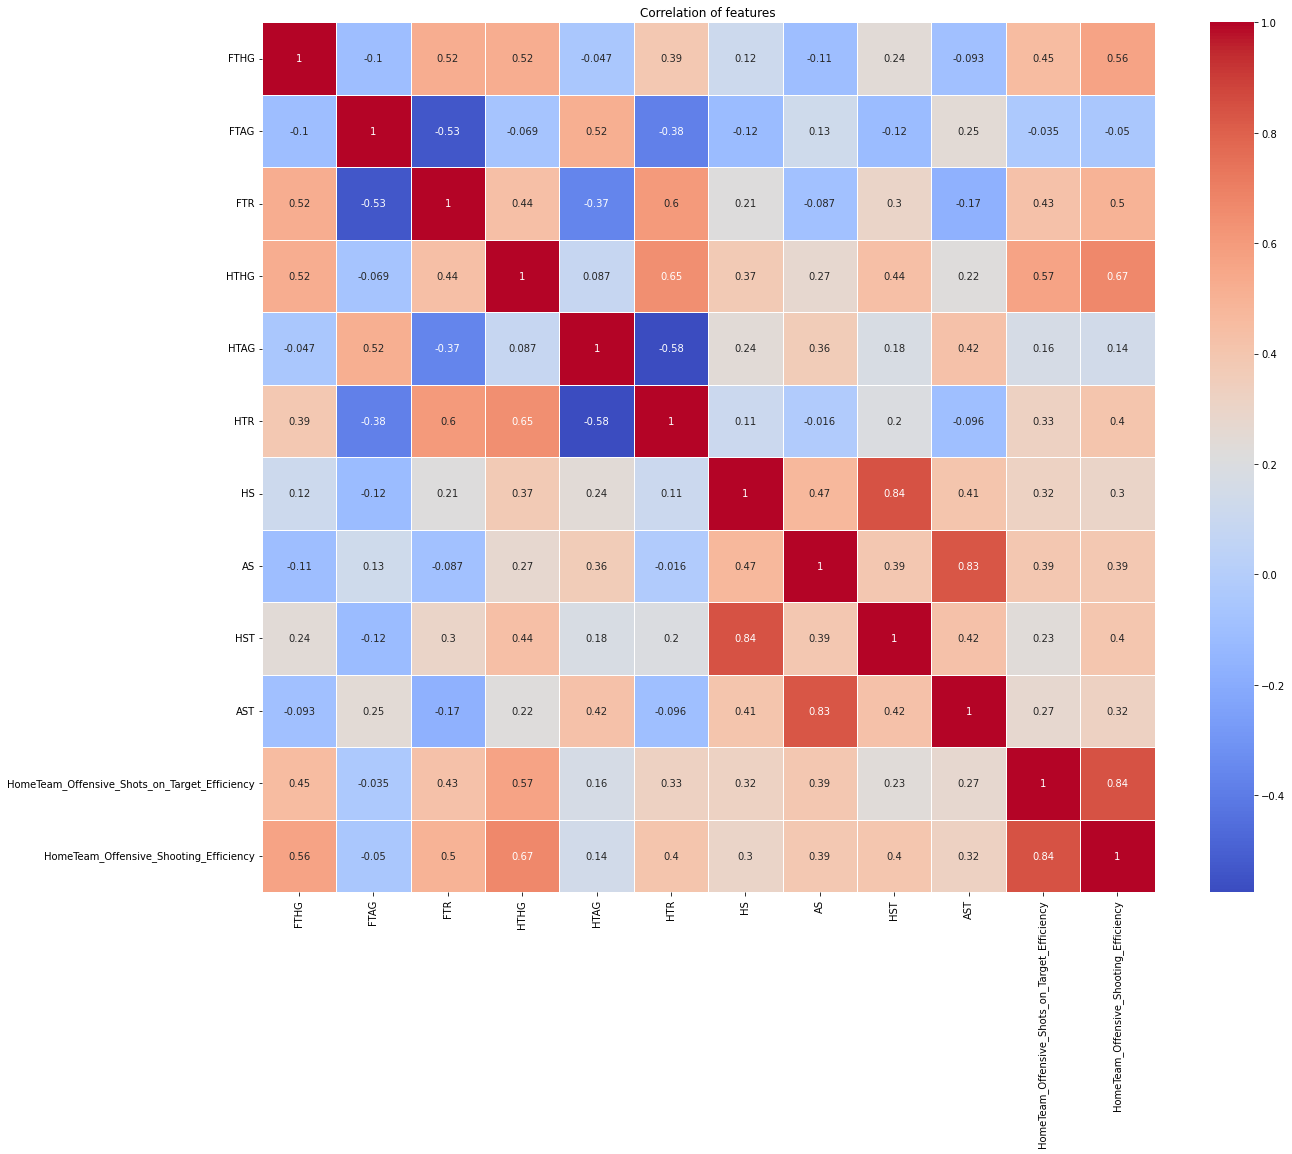

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cols =  ['FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST',
         'HomeTeam_Offensive_Shots_on_Target_Efficiency','HomeTeam_Offensive_Shooting_Efficiency'
        ]

# Heat Map
dataset = pd.read_csv('E:/学习/UCL/year-3/comp0036/new_epl_training.csv')
replacements = {'H': 1, 'A': -1, 'D': 0}
dataset['HTR'] = dataset['HTR'].map(replacements).fillna(dataset['HTR'])
dataset['FTR'] = dataset['FTR'].map(replacements).fillna(dataset['FTR'])
correlation_matrix =dataset[cols].corr()

# Create a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1.0)

# Display the plot
plt.title('Correlation of features')
plt.show()

[0 2 1 3 5 4 6]


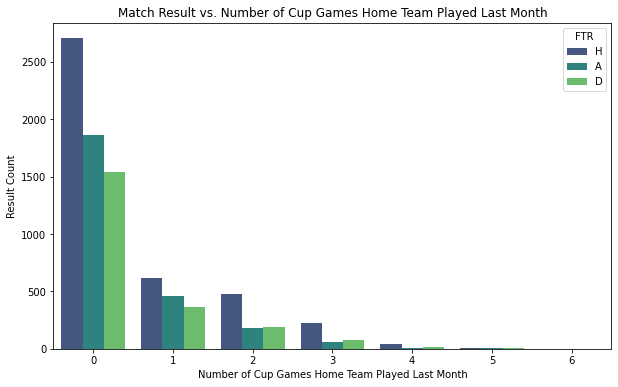

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('E:/学习/UCL/year-3/comp0036/new_epl_training.csv')
# Remove rows with unexpected values in 'FTR'
dataset = dataset[dataset['FTR'].isin(['H', 'A', 'D'])]
# Assuming 'EPL' is the correct column name
print(dataset['HomeTeam_CupGamesLastMonth'].unique())

data_to_plot = dataset[['HomeTeam_CupGamesLastMonth', 'FTR']]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='HomeTeam_CupGamesLastMonth', hue='FTR', data=data_to_plot, palette='viridis')
plt.title('Match Result vs. Number of Cup Games Home Team Played Last Month')
plt.xlabel('Number of Cup Games Home Team Played Last Month')
plt.ylabel('Result Count')
plt.show()

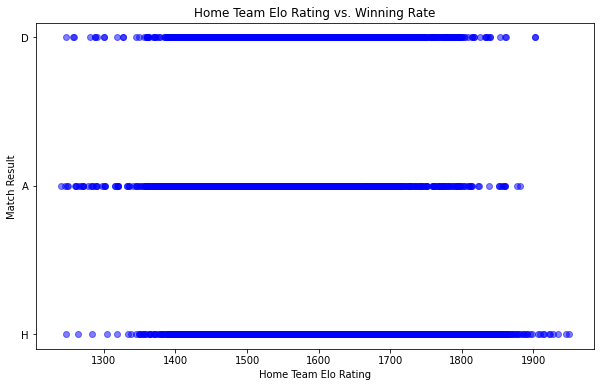

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ELP' is a column in your dataset
# If not, replace it with the actual column name
dataset = pd.read_csv('E:/学习/UCL/year-3/comp0036/new_epl_training.csv')
dataset = dataset[dataset['FTR'].isin(['H', 'A', 'D'])]
data_to_plot = dataset[['HomeTeam_Elo_Before_Match', 'FTR']]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_to_plot['HomeTeam_Elo_Before_Match'], data_to_plot['FTR'], alpha=0.5, color='blue')
plt.title('Home Team Elo Rating vs. Winning Rate')
plt.xlabel('Home Team Elo Rating')
plt.ylabel('Match Result')
plt.show()


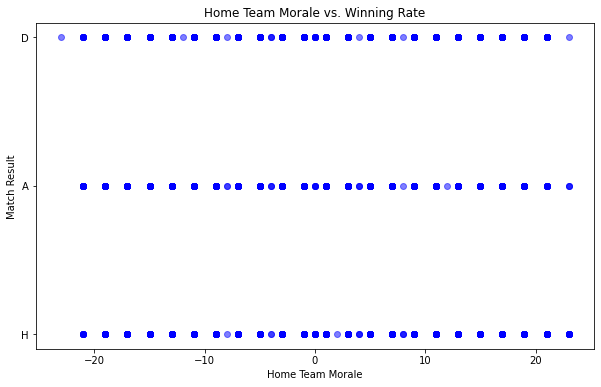

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ELP' is a column in your dataset
# If not, replace it with the actual column name
dataset = pd.read_csv('E:/学习/UCL/year-3/comp0036/new_epl_training.csv')
dataset = dataset[dataset['FTR'].isin(['H', 'A', 'D'])]
data_to_plot = dataset[['HomeTeam_Morale', 'FTR']]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_to_plot['HomeTeam_Morale'], data_to_plot['FTR'], alpha=0.5, color='blue')
plt.title('Home Team Morale vs. Winning Rate')
plt.xlabel('Home Team Morale')
plt.ylabel('Match Result')
plt.show()


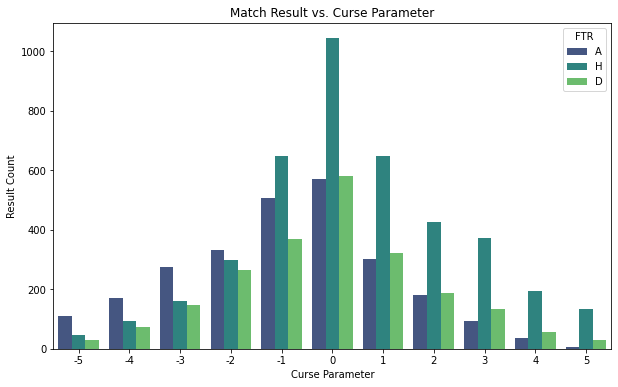

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('E:/学习/UCL/year-3/comp0036/new_epl_training.csv')
# Remove rows with unexpected values in 'FTR'
dataset = dataset[dataset['FTR'].isin(['H', 'A', 'D'])]

data_to_plot = dataset[['Curse_Parameter', 'FTR']]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Curse_Parameter', hue='FTR', data=data_to_plot, palette='viridis')  # Added 'order' parameter
plt.title('Match Result vs. Curse Parameter')
plt.xlabel('Curse Parameter')
plt.ylabel('Result Count')
plt.show()

In [ ]:
#for measuring training time
from time import time 
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, average='micro'), sum(target == y_pred) / float(len(y_pred))

def train_predict(clf, X_train, y_train, X_test, y_test):

    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print(f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

## Make Prediction

In [ ]:
# Initialize and train the NB model
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf_nb, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Evaluate the model on the test set
train_predict(clf_nb, X_train, y_train, X_test, y_test)

Cross-validation Scores: [0.51649485 0.50128932 0.54357916 0.51933987 0.54151625]
Mean Accuracy: 0.5244438891340526
Training a GaussianNB using a training set size of 9696. . .
Trained model in 0.0311 seconds
Made predictions in 0.0360 seconds.
0.5410478547854786 0.5410478547854786
F1 score and accuracy score for training set: 0.5410 , 0.5410.
Made predictions in 0.0070 seconds.
F1 score and accuracy score for test set: 0.5492 , 0.5492.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score

# Define the parameter distribution to search
param_dist = {
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(1, 5),
    'subsample': uniform(0.8, 0.2),
    'colsample_bytree': uniform(0.3, 0.5),
    'n_estimators': randint(100, 200),
}

# Initialize xgb model with regularization parameters
clf_xgb = XGBClassifier(seed=82, reg_alpha=0.1, reg_lambda=0.1, objective='multi:softmax', num_class=3, 
                        eval_metric='mlogloss')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf_xgb, param_distributions=param_dist, n_iter=10, scoring='f1_micro', random_state=42, cv=5
)

# Perform random search on the resampled training set
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: {:.4f}".format(random_search.best_score_))

# Use the best model directly for early stopping
best_model_xgb = random_search.best_estimator_

# Set up evaluation sets for early stopping
X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=42)
evals = [(X_val, y_val)]

# Train the XGBoost model with early stopping
best_model_xgb.fit(X_train, y_train, eval_set=evals, early_stopping_rounds=20)

# Evaluate the model with the best hyperparameters on the test set
train_predict(best_model_xgb, X_train, y_train, X_test, y_test)

Best Parameters:  {'colsample_bytree': 0.45212112147976885, 'learning_rate': 0.062475643163223786, 'max_depth': 4, 'n_estimators': 188, 'subsample': 0.8582458280396085}
Best Score: 0.8974
[0]	validation_0-mlogloss:1.06882
[1]	validation_0-mlogloss:1.03584
[2]	validation_0-mlogloss:1.00347
[3]	validation_0-mlogloss:0.97579


c:\Users\86182\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-mlogloss:0.95121
[5]	validation_0-mlogloss:0.92499
[6]	validation_0-mlogloss:0.89708
[7]	validation_0-mlogloss:0.87407
[8]	validation_0-mlogloss:0.85049
[9]	validation_0-mlogloss:0.82592
[10]	validation_0-mlogloss:0.80713
[11]	validation_0-mlogloss:0.78962
[12]	validation_0-mlogloss:0.76734
[13]	validation_0-mlogloss:0.75195
[14]	validation_0-mlogloss:0.73449
[15]	validation_0-mlogloss:0.71794
[16]	validation_0-mlogloss:0.70060
[17]	validation_0-mlogloss:0.68565
[18]	validation_0-mlogloss:0.67232
[19]	validation_0-mlogloss:0.65892
[20]	validation_0-mlogloss:0.64792
[21]	validation_0-mlogloss:0.63229
[22]	validation_0-mlogloss:0.62207
[23]	validation_0-mlogloss:0.61739
[24]	validation_0-mlogloss:0.60863
[25]	validation_0-mlogloss:0.59870
[26]	validation_0-mlogloss:0.58951
[27]	validation_0-mlogloss:0.57653
[28]	validation_0-mlogloss:0.56843
[29]	validation_0-mlogloss:0.55643
[30]	validation_0-mlogloss:0.54878
[31]	validation_0-mlogloss:0.53838
[32]	validation_0-mlogloss

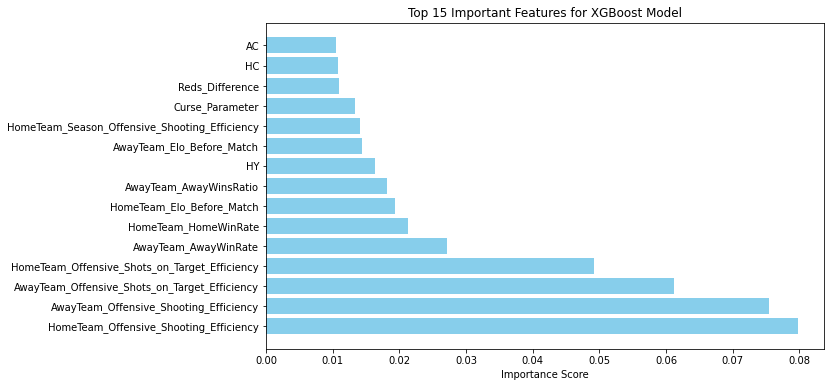

In [ ]:
import matplotlib.pyplot as plt

# Assuming best_model_xgb is your trained XGBoost model
# If not, replace it with your actual trained model
feature_importance = best_model_xgb.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 15 features
top_features = feature_importance_df.head(15)

# Plotting the top features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 15 Important Features for XGBoost Model')
plt.show()